In [39]:
import numpy as np
import torch as tc
import os

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
fontProperties = {'family': 'serif', 'serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

In [6]:
## For a 64 x 64 x 64 sample: sample1 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(200).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(64).to(dev)
sample_height_n = tc.tensor(64).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"C": 6, "O": 8, "Si": 14, "Ca": 20, "Fe": 26}
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample1_pad'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample1_data'
f_XRF_data = 'XRF_sample1'
f_XRT_data = 'XRT_sample1'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample1_recon'
if not os.path.exists(recon_path):
    os.mkdir(recon_path)
P_save_path = os.path.join(recon_path, 'Intersecting_Length_64_64_64')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [40]:
## For a 5 x 5 x 5 sample: sample1 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(16).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(5).to(dev)
sample_height_n = tc.tensor(5).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"C": 6, "O": 8, "Si": 14, "Ca": 20, "Fe": 26}
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample3_pad'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample3_data'
f_XRF_data = 'XRF_sample3'
f_XRT_data = 'XRT_sample3'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample3_recon'
if not os.path.exists(recon_path):
    os.mkdir(recon_path)
P_save_path = os.path.join(recon_path, 'Intersecting_Length_5_5_5')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [41]:
print(list(layer_idx_ls))
for idx, layer_idx in enumerate(layer_idx_ls):
    print(idx)

[0, 1, 2, 3, 4]
0
1
2
3
4


## Plot the ground truth

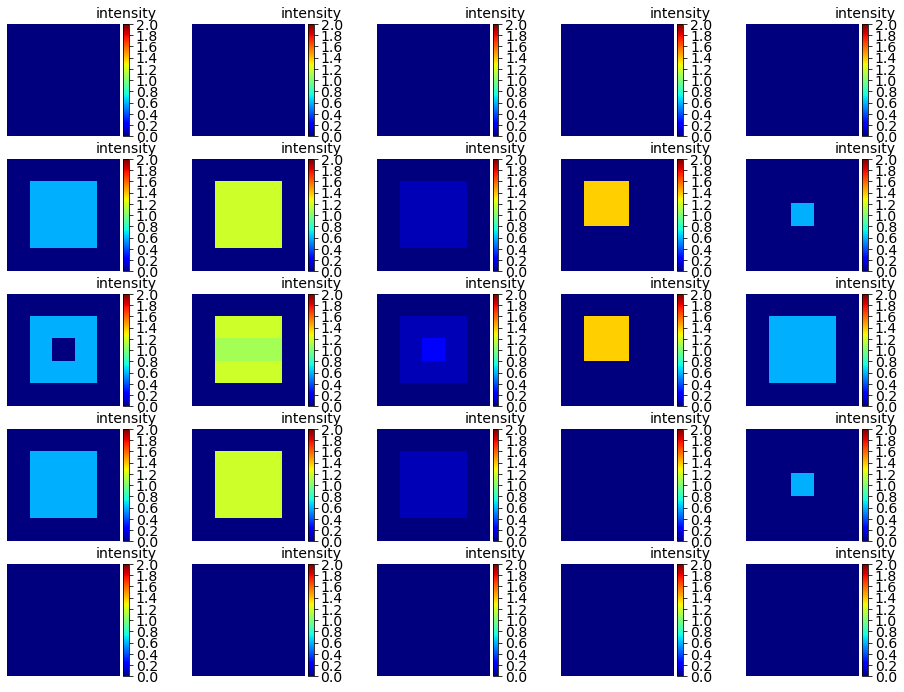

In [42]:
layer_idx_ls = range(0,5,1)

gt = np.load(os.path.join(grid_path, f_grid))

image_size = gt.shape[-1]
fig6 = plt.figure(figsize=(4 * gt.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = gt.shape[0], width_ratios=[1] * gt.shape[0])


for element_idx in range(gt.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(gt[element_idx,layer_idx], cmap='jet', vmin=0, vmax=2.0, extent=[0, 5, 5, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

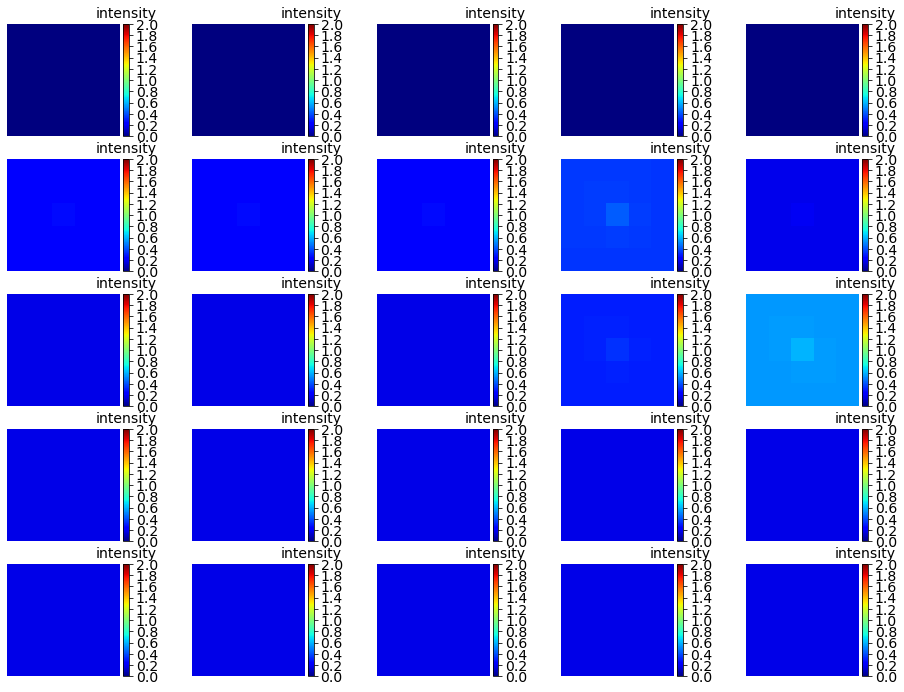

In [45]:
recon = np.load(os.path.join(recon_path, f_recon_grid)+'.npy')

image_size = recon.shape[-1]
fig6 = plt.figure(figsize=(4 * recon.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon.shape[0], width_ratios=[1] * recon.shape[0])


for element_idx in range(recon.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=2.0, extent=[0, 5, 5, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

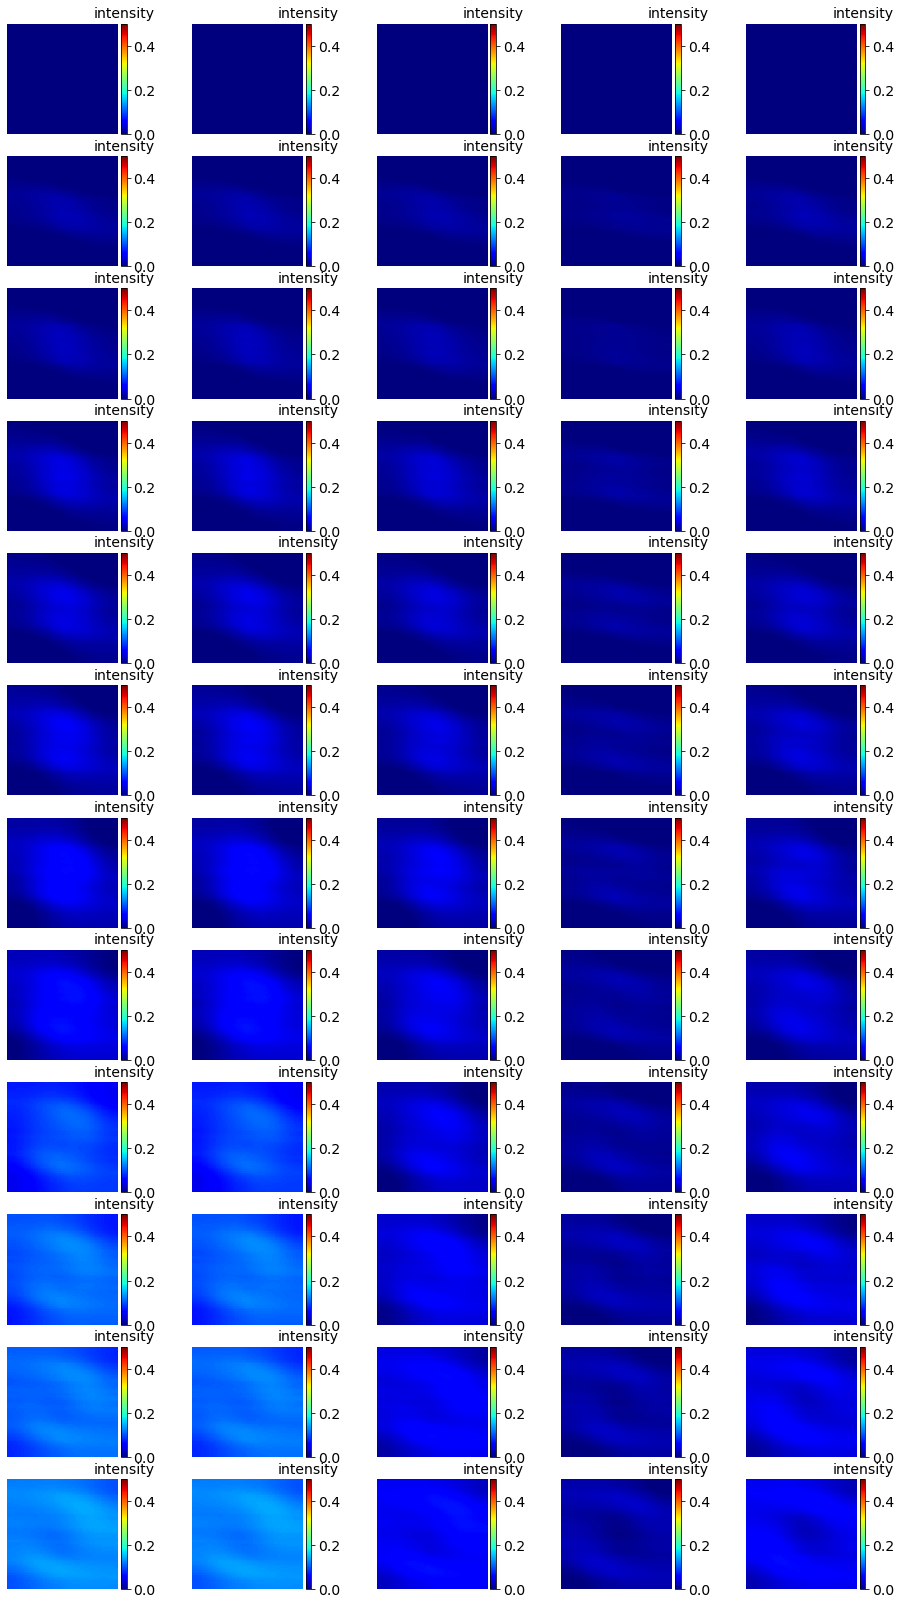

In [28]:
recon = np.load(os.path.join(recon_path, f_recon_grid)+'_b1m3.npy')

image_size = recon.shape[-1]
fig6 = plt.figure(figsize=(4 * recon.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon.shape[0], width_ratios=[1] * recon.shape[0])


for element_idx in range(recon.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=0.5, extent=[0, 5, 5, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


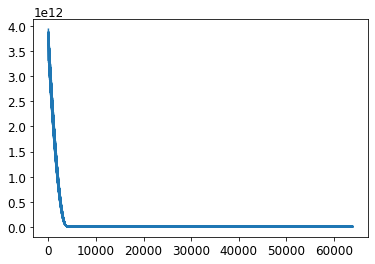

In [11]:
loss_minibatch =  np.load(os.path.join(recon_path, 'loss_minibatch.npy')).astype(np.float32)
plt.plot(loss_minibatch)

[0.0866771  0.01023245 0.00176553 0.00177027 0.00177048 0.00177052
 0.00177054 0.00177058 0.00177058 0.0017706  0.00177062 0.00177065
 0.0017706  0.00177063 0.00177065 0.00177065 0.00177064 0.00177067
 0.00177065 0.0017707  0.00177067 0.00177066 0.00177067 0.00177068
 0.00177063 0.00177069 0.00177066 0.00177068 0.00177067 0.00177072
 0.00177073 0.0017707  0.00177068 0.00177073 0.0017707  0.00177072
 0.00177068 0.00177073 0.00177074 0.00177071]


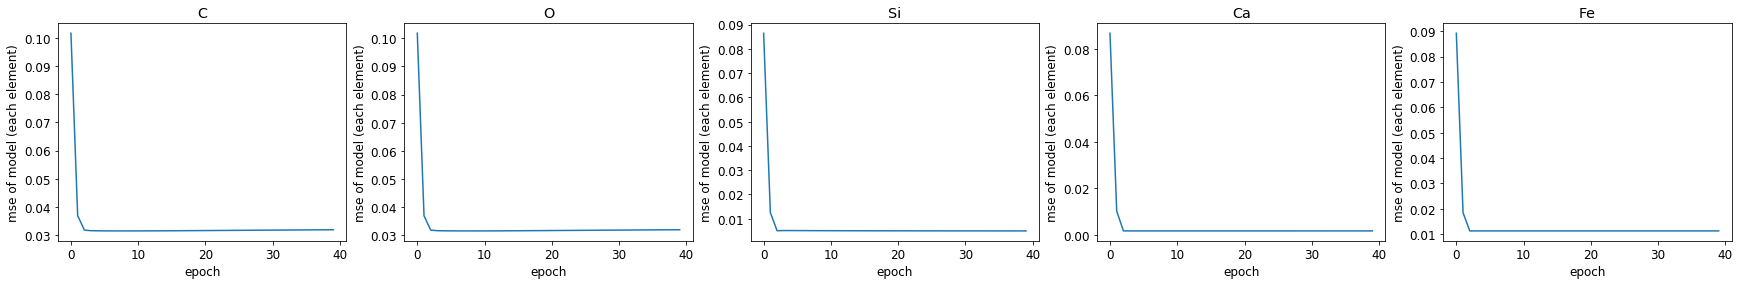

In [21]:
mse_epoch =  np.load(os.path.join(recon_path, 'mse_model_elements.npy')).astype(np.float32)

fig7 = plt.figure(figsize=(gt.shape[0]*6, 4))
gs7 = gridspec.GridSpec(nrows=1, ncols=gt.shape[0], width_ratios=[1]*gt.shape[0])
for i in range(gt.shape[0]):
    fig7_ax1 = fig7.add_subplot(gs7[0,i])
    fig7_ax1.plot(mse_epoch[:,i])
    fig7_ax1.set_xlabel('epoch')
    fig7_ax1.set_ylabel('mse of model (each element)')
    fig7_ax1.set_title(str(list(this_aN_dic.keys())[i]))
    fig7_ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    
print(mse_epoch[:,3])

In [12]:
del recon_params

In [13]:
print(recon_params)

NameError: name 'recon_params' is not defined